In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data (main)

In [2]:
df_tweet = pd.read_csv(r"E:\BINAR\Binar-Gold-Challenge\Dataset\data.csv", encoding='ISO-8859-1')
df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [3]:
print("Dataset size:", df_tweet.shape)
print("Columns are:", df_tweet.columns)

Dataset size: (13169, 13)
Columns are: Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')


In [4]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


# Cek Duplicate

In [5]:
df_tweet.shape

(13169, 13)

In [6]:
df_tweet.duplicated(subset='Tweet').sum()

146

In [7]:
df_tweet.duplicated().sum()

125

In [8]:
df_tweet = df_tweet.drop_duplicates(subset='Tweet')

In [9]:
df_tweet.duplicated(subset='Tweet').sum()

0

In [10]:
df_tweet.shape

(13023, 13)

# Cleaning Data

In [11]:
#Fucntion to Clean tweet data
def Clean(text):
    #lowercase for every word
    text = text.lower()

    #Clean Pattern
    #remove USER
    text = re.sub(r'user', ' ', text)
    #remove 'RT'
    text = re.sub(r'rt', ' ', text)
    #remove 'URL'
    text = re.sub(r'url', ' ', text)
    #remove HTTPS
    text = re.sub(r'https', ' ', text)
    #remove HTTP
    text = re.sub(r'http', ' ', text)
    #remove &amp
    text = re.sub(r'&amp', ' ', text)

    #Clean_Unnecessary_Character
    #remove \n or every word afte '\' with space
    text = re.sub(r'\\+[a-zA-Z0-9]+', ' ', text)
    #remove text emoji
    text = re.sub(r'[^a-zA-Z0-9\s]{2,}|:[a-zA-Z0-9]{0,}', ' ', text)
    #remove all unnecessary character 
    text = re.sub(r'[^0-9a-zA-Z\s]+', ' ', text)
    #remove all number
    text = re.sub(r'[0-9]+', ' ', text)
    #remove extra space
    text = re.sub(r'  +', ' ', text)
    #remove space at the start or the end of string
    text = re.sub(r'^ +| +$', '', text)
    
    return text

#tokenization Function
def tokenization(text):
    text = re.split('\W+', text)
    return text

#import file new_kamusalay.csv
kamus_alay = pd.read_csv(r"E:\BINAR\Binar-Gold-Challenge\Dataset\new_kamusalay.csv", encoding = 'ISO-8859-1', header = None)
kamus_alay = kamus_alay.rename(columns={0: 'kata alay', 1: 'arti kata'})

#Create dictionary from kamus_alay
kamus_alay_dict = dict(zip(kamus_alay['kata alay'], kamus_alay['arti kata']))

#normalization function to convert every word tha contain 'kata alay' to 'arti kata'
def normalization(text):
    newlist = []
    for word in text:
        if word in kamus_alay_dict:
            text = kamus_alay_dict[word]
            newlist.append(text)
        else:
            text = word
            newlist.append(text)
    return newlist

#remove stopwords
#stopword list
f = open(r"E:\BINAR\Binar-Gold-Challenge\Dataset\tala-stopwords-indonesia.txt")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

stopword_list.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       'gue', 'yah', 'kayak'])

stopword_list = set(stopword_list)

#remove stopword function
def remove_stopwords(text):
    text = [word for word in text if word not in stopword_list]
    return text

#function to run all the function
def clean_data(text):
    text = Clean(text)
    text = tokenization(text)
    text = normalization(text)
    text = remove_stopwords(text)

    return text

#apply clean_data function
df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: ' '.join(map(str, clean_data(x))))
df_tweet['Tweet_token'] = df_tweet['Tweet'].apply(clean_data)

df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_token
0,di saat cowok berusaha melacak perhatian lanta...,1,1,1,0,0,0,0,0,1,1,0,0,"[cowok, berusaha, melacak, perhatian, lantas, ..."
1,telat edan sarap bergaul cigax jifla calis licew,0,1,0,0,0,0,0,0,0,0,0,0,"[telat, edan, sarap, bergaul, cigax, jifla, ca..."
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,0,0,0,0,0,0,0,0,0,0,"[kadang, berpikir, percaya, tuhan, jatuh, berk..."
3,matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,"[matamu, sipit]"
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[kaum, cebong, kafir, dongoknya, dungu, haha]"


In [12]:
print("Dataset size:", df_tweet.shape)
df_tweet.info()

Dataset size: (13023, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 13023 entries, 0 to 13168
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13023 non-null  object
 1   HS             13023 non-null  int64 
 2   Abusive        13023 non-null  int64 
 3   HS_Individual  13023 non-null  int64 
 4   HS_Group       13023 non-null  int64 
 5   HS_Religion    13023 non-null  int64 
 6   HS_Race        13023 non-null  int64 
 7   HS_Physical    13023 non-null  int64 
 8   HS_Gender      13023 non-null  int64 
 9   HS_Other       13023 non-null  int64 
 10  HS_Weak        13023 non-null  int64 
 11  HS_Moderate    13023 non-null  int64 
 12  HS_Strong      13023 non-null  int64 
 13  Tweet_token    13023 non-null  object
dtypes: int64(12), object(2)
memory usage: 1.5+ MB


# Sentimen Analysis (NLTK)

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
sentiments = SentimentIntensityAnalyzer()
df_tweet['Positive'] = [sentiments.polarity_scores (i) ['pos'] for i in df_tweet['Tweet']]
df_tweet['Negative'] = [sentiments.polarity_scores (i) ['neg'] for i in df_tweet['Tweet']]
df_tweet['Neutral'] = [sentiments.polarity_scores (i) ['neu'] for i in df_tweet['Tweet']]
df_tweet['Compound'] = [sentiments.polarity_scores (i) ['compound'] for i in df_tweet['Tweet']]
df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_token,Positive,Negative,Neutral,Compound
0,di saat cowok berusaha melacak perhatian lanta...,1,1,1,0,0,0,0,0,1,1,0,0,"[cowok, berusaha, melacak, perhatian, lantas, ...",0.000,0.0,1.000,0.0000
1,telat edan sarap bergaul cigax jifla calis licew,0,1,0,0,0,0,0,0,0,0,0,0,"[telat, edan, sarap, bergaul, cigax, jifla, ca...",0.000,0.0,1.000,0.0000
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,0,0,0,0,0,0,0,0,0,0,"[kadang, berpikir, percaya, tuhan, jatuh, berk...",0.000,0.0,1.000,0.0000
3,matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,"[matamu, sipit]",0.000,0.0,1.000,0.0000
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[kaum, cebong, kafir, dongoknya, dungu, haha]",0.375,0.0,0.625,0.4588


In [15]:
score = df_tweet['Compound'].values
sentiment = []
for i in score :
    if i >= 0.05 :
        sentiment.append('positif')
    elif i<= -0.5 :
        sentiment.append('negatif')
    else :
        sentiment.append('netral')
df_tweet['Sentiment'] = sentiment
df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_token,Positive,Negative,Neutral,Compound,Sentiment
0,di saat cowok berusaha melacak perhatian lanta...,1,1,1,0,0,0,0,0,1,1,0,0,"[cowok, berusaha, melacak, perhatian, lantas, ...",0.000,0.0,1.000,0.0000,netral
1,telat edan sarap bergaul cigax jifla calis licew,0,1,0,0,0,0,0,0,0,0,0,0,"[telat, edan, sarap, bergaul, cigax, jifla, ca...",0.000,0.0,1.000,0.0000,netral
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,0,0,0,0,0,0,0,0,0,0,"[kadang, berpikir, percaya, tuhan, jatuh, berk...",0.000,0.0,1.000,0.0000,netral
3,matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,"[matamu, sipit]",0.000,0.0,1.000,0.0000,netral
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[kaum, cebong, kafir, dongoknya, dungu, haha]",0.375,0.0,0.625,0.4588,positif


# Determain Tweet of Hate Speech and Abusive

## Creating Categories for Tweet of Hate Speech and Abusive

In [16]:
def type_of_Tweet(Tweet):
    if Tweet['HS'] == 1:
        if Tweet['Abusive'] == 1:
            type = 'Hate Speech & Abusive'
        elif Tweet['Abusive'] == 0:
            type = 'Hate Speech'
    elif Tweet['HS'] == 0:
        if Tweet['Abusive'] == 1:
            type = 'Abusive'
        elif Tweet['Abusive'] == 0:
            type = 'Netral'
    
    return type

**Kesimpulan**: dari proses di atas jenis Tweet di bagi menjadi 4 kategori berdasarkan isi kolom HS dan Abusive.
1. Abusive untuk Tweet dengan nilai kolom Abusive 1 dan Hate Speech 0
2. Hate Speech untuk Tweet dengan nilai kolom Abusive 0 dan Hate Speech 1
3. Hate Speech & Abusive untuk Tweet dengan nilai kolom Abusive 1 dan Hate Speech 1
4. Netral untuk Tweet dengan nilai kolom Abusive 1 dan Hate Speech 1

In [17]:
df_tweet['type_of_Tweet'] = df_tweet.apply(type_of_Tweet, axis=1)
df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_token,Positive,Negative,Neutral,Compound,Sentiment,type_of_Tweet
0,di saat cowok berusaha melacak perhatian lanta...,1,1,1,0,0,0,0,0,1,1,0,0,"[cowok, berusaha, melacak, perhatian, lantas, ...",0.000,0.0,1.000,0.0000,netral,Hate Speech & Abusive
1,telat edan sarap bergaul cigax jifla calis licew,0,1,0,0,0,0,0,0,0,0,0,0,"[telat, edan, sarap, bergaul, cigax, jifla, ca...",0.000,0.0,1.000,0.0000,netral,Abusive
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,0,0,0,0,0,0,0,0,0,0,"[kadang, berpikir, percaya, tuhan, jatuh, berk...",0.000,0.0,1.000,0.0000,netral,Netral
3,matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,"[matamu, sipit]",0.000,0.0,1.000,0.0000,netral,Netral
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[kaum, cebong, kafir, dongoknya, dungu, haha]",0.375,0.0,0.625,0.4588,positif,Hate Speech & Abusive


In [18]:
df_tweet['type_of_Tweet'] = df_tweet['type_of_Tweet'].astype('category')
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13023 entries, 0 to 13168
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Tweet          13023 non-null  object  
 1   HS             13023 non-null  int64   
 2   Abusive        13023 non-null  int64   
 3   HS_Individual  13023 non-null  int64   
 4   HS_Group       13023 non-null  int64   
 5   HS_Religion    13023 non-null  int64   
 6   HS_Race        13023 non-null  int64   
 7   HS_Physical    13023 non-null  int64   
 8   HS_Gender      13023 non-null  int64   
 9   HS_Other       13023 non-null  int64   
 10  HS_Weak        13023 non-null  int64   
 11  HS_Moderate    13023 non-null  int64   
 12  HS_Strong      13023 non-null  int64   
 13  Tweet_token    13023 non-null  object  
 14  Positive       13023 non-null  float64 
 15  Negative       13023 non-null  float64 
 16  Neutral        13023 non-null  float64 
 17  Compound       13023 non-null  float

## Select Column that will be used

In [19]:
df_HS_Abusive = df_tweet.reindex(columns=['Tweet','HS', 'Abusive', 'type_of_Tweet'])
df_HS_Abusive

,Tweet,HS,Abusive,type_of_Tweet
0,di saat cowok berusaha melacak perhatian lanta...,1,1,Hate Speech & Abusive
1,telat edan sarap bergaul cigax jifla calis licew,0,1,Abusive
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,Netral
3,matamu sipit,0,0,Netral
4,kaum cebong kafir dongoknya dungu haha,1,1,Hate Speech & Abusive
...,...,...,...,...
13164,berbicara ndasmu congor sekate anjing,1,1,Hate Speech & Abusive
13165,kasur enak kunyuk,0,1,Abusive
13166,hati hati bisu bosan duh,0,0,Netral
13167,bom real mudah terdeteksi bom terkubur dahsyat...,0,0,Netral


In [20]:
#count the value of type_of_Tweet
HS_Abusive = df_HS_Abusive['type_of_Tweet'].value_counts()
HS_Abusive

type_of_Tweet
Netral                   5780
Hate Speech & Abusive    3250
Hate Speech              2251
Abusive                  1742
Name: count, dtype: int64

## Visualization for showing Tweet of Hate Speech and Abusive

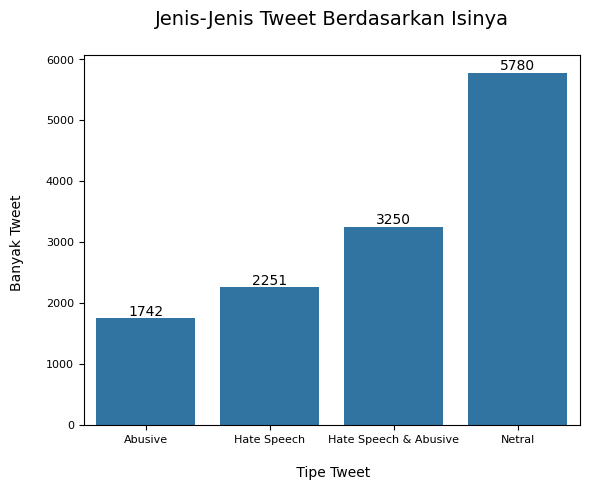

In [21]:
#Visualised type_of_Tweet
ax = sns.countplot(x='type_of_Tweet', data=df_HS_Abusive)

#To show Values in each bar
ax.bar_label(ax.containers[0], fontsize=10)

#setting     
plt.title('Jenis-Jenis Tweet Berdasarkan Isinya\n', fontsize=14)
plt.xlabel('\n Tipe Tweet')
plt.ylabel('Banyak Tweet \n')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

**Kesimpulan**: dari diagram batang di atas jenis Tweet di bagi menjadi 4 kategori berdasarkan isi kolom HS dan Abusive.
1. Abusive memiliki total sebanyak 1668 Tweet
2. Hate Speech memiliki total sebanyak 2219 Tweet
3. Hate Speech & Abusive memiliki total sebanyak 3114 Tweet
4. Netral memiliki total sebanyak 5641 Tweet

**Tweet kategori Netral memiliki jumlah Tweet terbanyak**

(-1.25, 1.25, -1.25, 1.25)

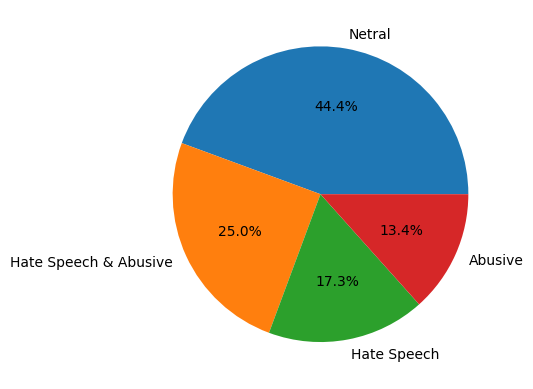

In [22]:
labels = ['Netral', 'Hate Speech & Abusive', 'Hate Speech', 'Abusive']
# Membuat visualisasi menggunakan pie chart
HS_Abusive.plot(kind='pie', labels= labels, autopct='%1.1f%%')
plt.axis('off')

**Kesimpulan**: dari diagram lingkaran di atas jenis Tweet di bagi menjadi 4 kategori berdasarkan isi kolom HS dan Abusive.
1. Abusive memiliki prosentase sebesar 13.2%
2. Hate Speech memiliki prosentase sebesar 17.6%
3. Hate Speech & Abusive memiliki prosentase sebesar 24.6%
4. Netral memiliki prosentase sebesar 44.6%

**Kategori Netral memiliki prosentase terbanyak dengan 44.6% dari total Tweet**

### WordCloud

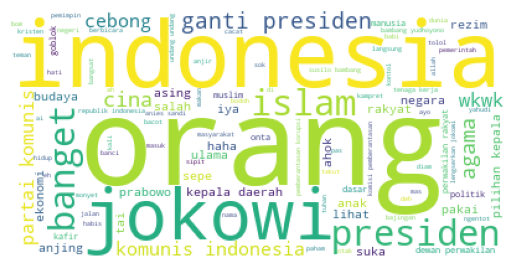

In [23]:
from wordcloud import WordCloud, ImageColorGenerator

# Create the parameter input
tweet_All = ' '.join(df_HS_Abusive['Tweet'])

# Create and generate a word cloud image:
wordcloud_All = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
plt.imshow(wordcloud_All)
#plt.title('Kata yang Banyak Digunkan', fontsize=30)
plt.axis('off')

plt.show()

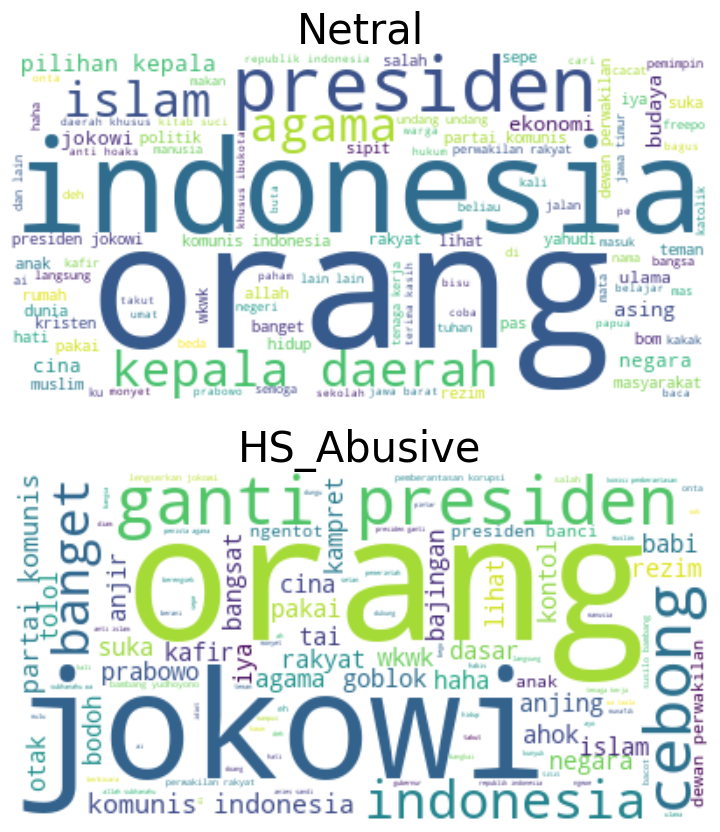

In [73]:
from wordcloud import WordCloud, ImageColorGenerator

# Create the parameter input
tweet_Netral = ' '.join(df_HS_Abusive['Tweet'][df_HS_Abusive.type_of_Tweet=="Netral"])
tweet_HS_Abusive = ' '.join(df_HS_Abusive['Tweet'][df_HS_Abusive.type_of_Tweet!="Netral"])

# Create and generate a word cloud image:
wordcloud_Netral = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_Netral)
wordcloud_HS_Abusive = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_HS_Abusive)

# Display the generated image:
fig, ax = plt.subplots(2, figsize = (10,10))

ax[0].imshow(wordcloud_Netral, interpolation='bilinear')
ax[0].set_title('Netral', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_HS_Abusive, interpolation='bilinear')
ax[1].set_title('HS_Abusive',fontsize=30)
ax[1].axis('off')

plt.show()

**Kesimpulan**: Dari gambar diatas apabila Tweet memiliki 2 kategori, yang pertama Tweet yang memiliki konten Hate Speech & Abusive dan yang kedua tidak memiliki konten berisi. didapati hasil
1. kata terbanyak yang muncul pada kategori Netral adalah indonesia, presiden, islam, agama, asing, kepala, daerah, asing, pilihan, kepala, budaya, negara 
2. kata terbanyak yang muncul pada kategori HS_Abusive adalah jokowi, cebong, indonesia, ganti, presiden, banget, ahok, partai, komunis, cina, anjing

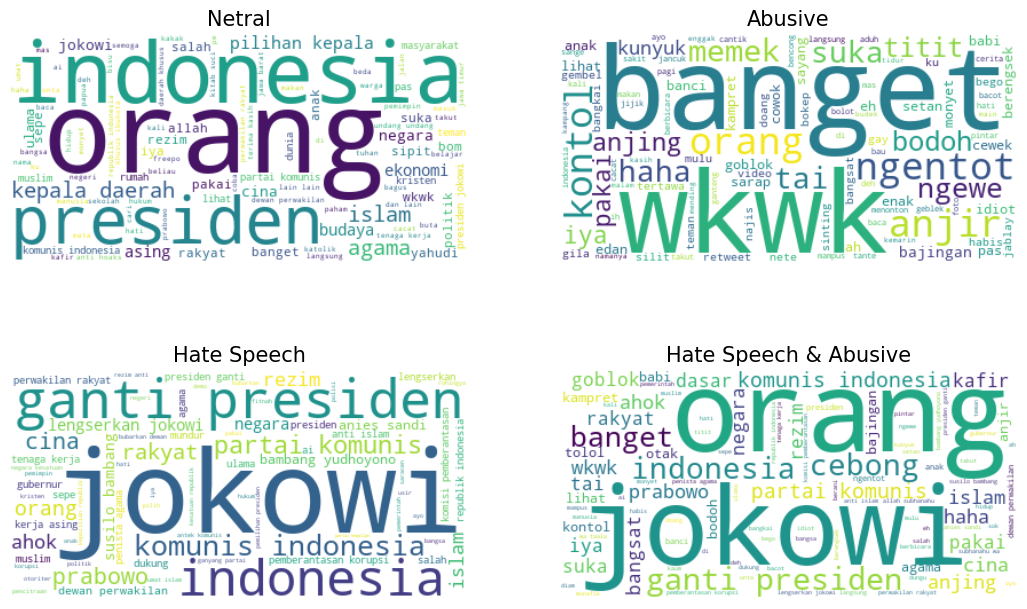

In [25]:
from wordcloud import WordCloud, ImageColorGenerator

# Create the parameter input
tweet_Netral = ' '.join(df_HS_Abusive['Tweet'][df_HS_Abusive.type_of_Tweet=="Netral"])
tweet_HS = ' '.join(df_HS_Abusive['Tweet'][df_HS_Abusive.type_of_Tweet=="Hate Speech"])
tweet_Abusive = ' '.join(df_HS_Abusive['Tweet'][df_HS_Abusive.type_of_Tweet=="Abusive"])
tweet_HS_Abusive_ = ' '.join(df_HS_Abusive['Tweet'][df_HS_Abusive.type_of_Tweet=="Hate Speech & Abusive"])

# Create and generate a word cloud image:
wordcloud_Netral = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_Netral)
wordcloud_HS = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_HS)
wordcloud_Abusive = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_Abusive)
wordcloud_HS_Abusive_ = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_HS_Abusive)

# Display the generated image:
fig, ax = plt.subplots(2,2, figsize=(13,8))

ax[0,0].imshow(wordcloud_Netral, interpolation='bilinear')
ax[0,0].set_title('Netral', fontsize=15)
ax[0,0].axis('off')

ax[1,0].imshow(wordcloud_HS, interpolation='bilinear')
ax[1,0].set_title('Hate Speech',fontsize=15)
ax[1,0].axis('off')

ax[0,1].imshow(wordcloud_Abusive, interpolation='bilinear')
ax[0,1].set_title('Abusive', fontsize=15)
ax[0,1].axis('off')

ax[1,1].imshow(wordcloud_HS_Abusive_, interpolation='bilinear')
ax[1,1].set_title('Hate Speech & Abusive',fontsize=15)
ax[1,1].axis('off')

plt.show()

**Kesimpulan**: Dari gambar diatas apabila Tweet memiliki 4 kategori, Netral, Abusive, Hate Speech, dan Hate Speech & Abusive
1. kata terbanyak yang muncul pada kategori Netral adalah indonesia, presiden, islam, agama, asing, kepala, daerah, asing, pilihan, kepala, budaya, negara 
2. kata terbanyak yang muncul pada kategori Abusive adalah wkwk, kontol, banget, anjiir, ngentot, haha, titit, suka, memek, tai
3. kata terbanyak yang muncul pada kategori Abusive Hate Speech jokowi, komunis, indonesia, cina, partai, ahok, ganti, presiden, rezim, prabowo
4. kata terbanyak yang muncul pada kategori HateSpeech & Abusive adalah jokowi, indonesia, banget, ganti, presiden, cebong, indonesia, komunis, partai, ahok, anjing

# Determain Target of Tweet

## Creating Categories for terget toward individu or group

In [26]:
def target_of_Tweet(Tweet):
    if Tweet['HS_Individual'] == 1:
        if Tweet['HS_Group'] == 1:
            type = 'Individual & Group'
        elif Tweet['HS_Group'] == 0:
            type = 'Individual'
    elif Tweet['HS_Individual'] == 0:
        if Tweet['HS_Group'] == 1:
            type = 'Group'
        elif Tweet['HS_Group'] == 0:
            type = 'None'
    
    return type

**Kesimpulan**: dari proses di atas jenis Tweet di bagi menjadi 3 kategori berdasarkan taget/sasaran dari Tweet (berdasarkan kolom HS_Individual & HS_Group)
1. Individual & Group untuk Tweet dengan nilai kolom HS_Individual 1 dan HS_Group 1
2. Individual untuk Tweet dengan nilai kolom HS_Individual 1 dan HS_Group 0
3. Group untuk Tweet dengan nilai kolom HS_Individual 0 dan HS_Group 1
4. None untuk Tweet dengan nilai kolom HS_Individual 0 dan HS_Group 0

**Tweet kategori Netral memiliki jumlah Tweet terbanyak**

In [27]:
df_tweet['target_of_Tweet'] = df_tweet.apply(target_of_Tweet, axis=1)
df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,...,HS_Moderate,HS_Strong,Tweet_token,Positive,Negative,Neutral,Compound,Sentiment,type_of_Tweet,target_of_Tweet
0,di saat cowok berusaha melacak perhatian lanta...,1,1,1,0,0,0,0,0,1,...,0,0,"[cowok, berusaha, melacak, perhatian, lantas, ...",0.000,0.0,1.000,0.0000,netral,Hate Speech & Abusive,Individual
1,telat edan sarap bergaul cigax jifla calis licew,0,1,0,0,0,0,0,0,0,...,0,0,"[telat, edan, sarap, bergaul, cigax, jifla, ca...",0.000,0.0,1.000,0.0000,netral,Abusive,None
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,0,0,0,0,0,0,0,...,0,0,"[kadang, berpikir, percaya, tuhan, jatuh, berk...",0.000,0.0,1.000,0.0000,netral,Netral,None
3,matamu sipit,0,0,0,0,0,0,0,0,0,...,0,0,"[matamu, sipit]",0.000,0.0,1.000,0.0000,netral,Netral,None
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,...,1,0,"[kaum, cebong, kafir, dongoknya, dungu, haha]",0.375,0.0,0.625,0.4588,positif,Hate Speech & Abusive,Group


In [28]:
df_tweet['target_of_Tweet'] = df_tweet['target_of_Tweet'].astype('category')
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13023 entries, 0 to 13168
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Tweet            13023 non-null  object  
 1   HS               13023 non-null  int64   
 2   Abusive          13023 non-null  int64   
 3   HS_Individual    13023 non-null  int64   
 4   HS_Group         13023 non-null  int64   
 5   HS_Religion      13023 non-null  int64   
 6   HS_Race          13023 non-null  int64   
 7   HS_Physical      13023 non-null  int64   
 8   HS_Gender        13023 non-null  int64   
 9   HS_Other         13023 non-null  int64   
 10  HS_Weak          13023 non-null  int64   
 11  HS_Moderate      13023 non-null  int64   
 12  HS_Strong        13023 non-null  int64   
 13  Tweet_token      13023 non-null  object  
 14  Positive         13023 non-null  float64 
 15  Negative         13023 non-null  float64 
 16  Neutral          13023 non-null  float64 
 17

In [29]:
df_tweet['target_of_Tweet'].unique()

['Individual', 'None', 'Group']
Categories (3, object): ['Group', 'Individual', 'None']

Setelah pembagian kategori target hanya terdapat 3 kategori Group, Individual, None

**Kesimpulan**: Tidak ada tweet yang ditunjukan untuk Group & Individu sekaligus

## Filter and Reindex Column

In [30]:
df_of_Target = df_tweet.reindex(columns=['Tweet','HS_Individual', 'HS_Group', 'target_of_Tweet'])
df_of_Target

,Tweet,HS_Individual,HS_Group,target_of_Tweet
0,di saat cowok berusaha melacak perhatian lanta...,1,0,Individual
1,telat edan sarap bergaul cigax jifla calis licew,0,0,None
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,None
3,matamu sipit,0,0,None
4,kaum cebong kafir dongoknya dungu haha,0,1,Group
...,...,...,...,...
13164,berbicara ndasmu congor sekate anjing,1,0,Individual
13165,kasur enak kunyuk,0,0,None
13166,hati hati bisu bosan duh,0,0,None
13167,bom real mudah terdeteksi bom terkubur dahsyat...,0,0,None


In [31]:
df_of_Target['target_of_Tweet'].unique()

['Individual', 'None', 'Group']
Categories (3, object): ['Group', 'Individual', 'None']

In [32]:
#count the value of type_of_Tweet
Target_Tweet = df_of_Target['target_of_Tweet'].value_counts()
Target_Tweet

target_of_Tweet
None          7522
Individual    3528
Group         1973
Name: count, dtype: int64

In [33]:
Target_Individu = df_of_Target[df_of_Target['target_of_Tweet'] == 'Individual']
Target_Individu

,Tweet,HS_Individual,HS_Group,target_of_Tweet
0,di saat cowok berusaha melacak perhatian lanta...,1,0,Individual
10,jari ukur nyali bacot,1,0,Individual
11,banci kaleng malu pe anyaan nyungsep koe,1,0,Individual
13,aktor huru hara prabowo lengserkan pemerintaha...,1,0,Individual
14,bu guru enakan jablay guru sekolah dasar menik...,1,0,Individual
...,...,...,...,...
13155,makannya suruh baca anggaran pendapatan dan be...,1,0,Individual
13157,resep salah gubernur pakkkk presiden presiden ...,1,0,Individual
13161,berengsek orang terbuat kasar mulu,1,0,Individual
13164,berbicara ndasmu congor sekate anjing,1,0,Individual


In [34]:
Target_Group = df_of_Target[df_of_Target['target_of_Tweet'] == 'Group']
Target_Group

,Tweet,HS_Individual,HS_Group,target_of_Tweet
4,kaum cebong kafir dongoknya dungu haha,0,1,Group
5,bani taplak dan kawan kawan,0,1,Group
18,cowok gantle gantle namanya banci,0,1,Group
26,kerjaannya delay mulu setan,0,1,Group
28,partai komunis indonesia muncul jelang pemilih...,0,1,Group
...,...,...,...,...
13142,bubarkan dewan perwakilan rakyat bubarkan dewa...,0,1,Group
13144,babi jaringan cacat,0,1,Group
13151,komisi nasional hak asasi manusia sontoloyo,0,1,Group
13152,rizieq shihab front pembela islam jancuk anjin...,0,1,Group


## Visualization for showing Target of tweet toward individu or group

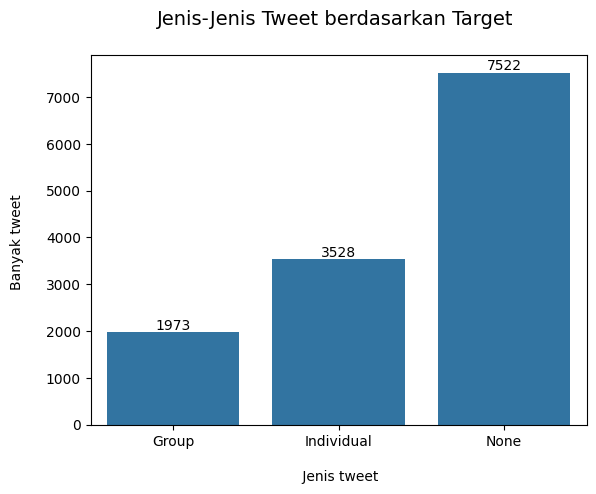

In [35]:
#Visualised type_of_Tweet
ax = sns.countplot(x='target_of_Tweet', data=df_of_Target)

#To show Values in each bar
ax.bar_label(ax.containers[0], fontsize=10)

#setting     
plt.title('Jenis-Jenis Tweet berdasarkan Target \n', fontsize=14)
plt.xlabel('\n Jenis tweet')
plt.ylabel('Banyak tweet \n')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Kesimpulan**: dari diagram batang di atas jenis Tweet di bagi menjadi 3 kategori berdasarkan taget/sasaran dari Tweet (berdasarkan kolom HS_Individual & HS_Group)
1. Group memiliki total sebanyak 1939 Tweet
2. Individu memiliki total sebanyak 3393 Tweet
3. None memiliki total sebanyak 7307 Tweet

**Tweet kategori None memiliki jumlah Tweet terbanyak**

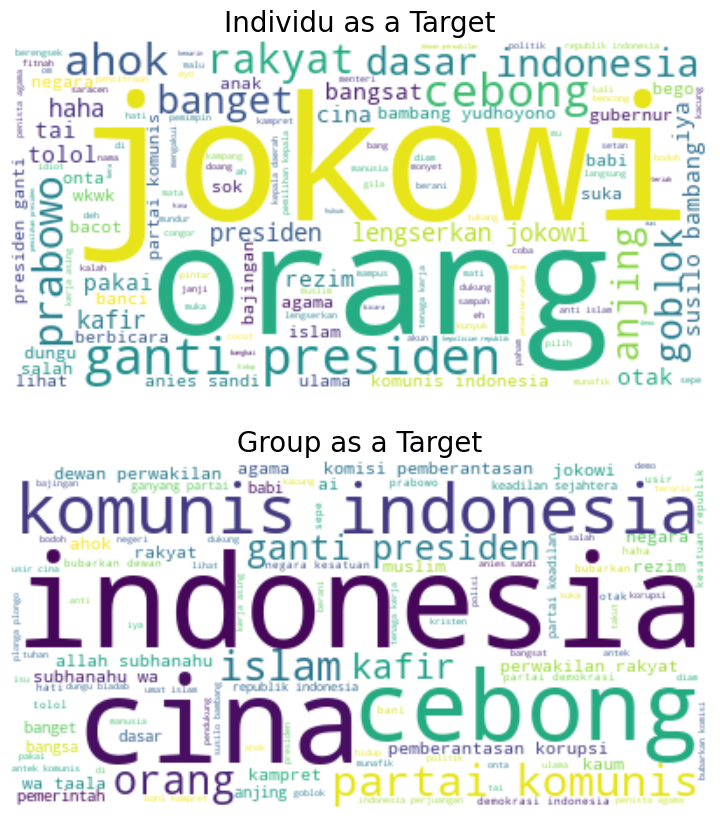

In [36]:
from wordcloud import WordCloud, ImageColorGenerator

# Create the parameter input
Target_individu = " ".join(review for review in Target_Individu.Tweet)
Target_group = " ".join(review for review in Target_Group.Tweet)

# Create and generate a word cloud image:
wordcloud_individu = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(Target_individu)
wordcloud_Group = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(Target_group)

# Display the generated image:
fig, ax = plt.subplots(2, 1, figsize = (10,10))

ax[0].imshow(wordcloud_individu, interpolation='bilinear')
ax[0].set_title('Individu as a Target', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_Group, interpolation='bilinear')
ax[1].set_title('Group as a Target',fontsize=20)
ax[1].axis('off')

plt.show()

# Make a comparison of distribution based on tweet HS_abusive and netral using direct function (lambda)

**Hypothesis:**
- N0 : HS_Abusive - has long text length than Netral
- N1:HS_AbusiveR - has not long text length thanHS_AbusiveR

In [37]:
df_HS_Abusive = df_tweet[['Tweet','HS', 'Abusive', 'type_of_Tweet']]
df_HS_Abusive

,Tweet,HS,Abusive,type_of_Tweet
0,di saat cowok berusaha melacak perhatian lanta...,1,1,Hate Speech & Abusive
1,telat edan sarap bergaul cigax jifla calis licew,0,1,Abusive
2,kadang berpikir percaya tuhan jatuh berkali ka...,0,0,Netral
3,matamu sipit,0,0,Netral
4,kaum cebong kafir dongoknya dungu haha,1,1,Hate Speech & Abusive
...,...,...,...,...
13164,berbicara ndasmu congor sekate anjing,1,1,Hate Speech & Abusive
13165,kasur enak kunyuk,0,1,Abusive
13166,hati hati bisu bosan duh,0,0,Netral
13167,bom real mudah terdeteksi bom terkubur dahsyat...,0,0,Netral


## Visualization

In [38]:
HS_Abusive_1 = df_HS_Abusive[df_HS_Abusive['type_of_Tweet'] != 'Netral' ]['Tweet'].apply(lambda x: len(x) - len(' '))
HS_Abusive_0 = df_HS_Abusive[df_HS_Abusive['type_of_Tweet'] == 'Netral' ]['Tweet'].apply(lambda x: len(x) - len(' '))

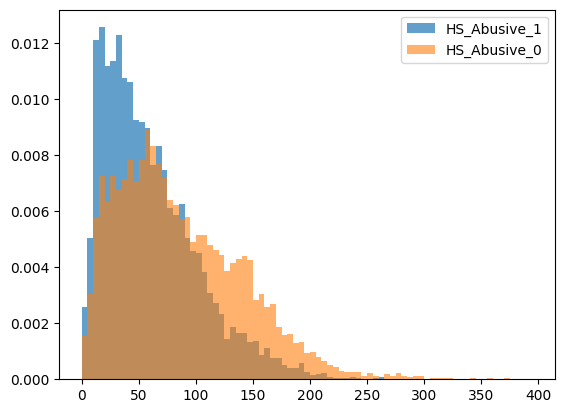

In [39]:
bins_ = np.linspace(0, 400, 80, endpoint=False)

plt.hist(HS_Abusive_1, bins= bins_, density= True, alpha = 0.7, label = 'HS_Abusive_1')
plt.hist(HS_Abusive_0, bins= bins_, density= True, alpha = 0.6, label = 'HS_Abusive_0')
plt.legend()

In [40]:
HS_Abusive_1 = df_HS_Abusive[df_HS_Abusive['type_of_Tweet'] == 'Hate Speech & Abusive' ]['Tweet'].apply(lambda x: len(x) - len(' '))
HS_1 = df_HS_Abusive[df_HS_Abusive['type_of_Tweet'] == 'Hate Speech' ]['Tweet'].apply(lambda x: len(x) - len(' '))
Abusive_1 = df_HS_Abusive[df_HS_Abusive['type_of_Tweet'] == 'Abusive' ]['Tweet'].apply(lambda x: len(x) - len(' '))
HS_Abusive_0 = df_HS_Abusive[df_HS_Abusive['type_of_Tweet'] == 'Netral' ]['Tweet'].apply(lambda x: len(x) - len(' '))

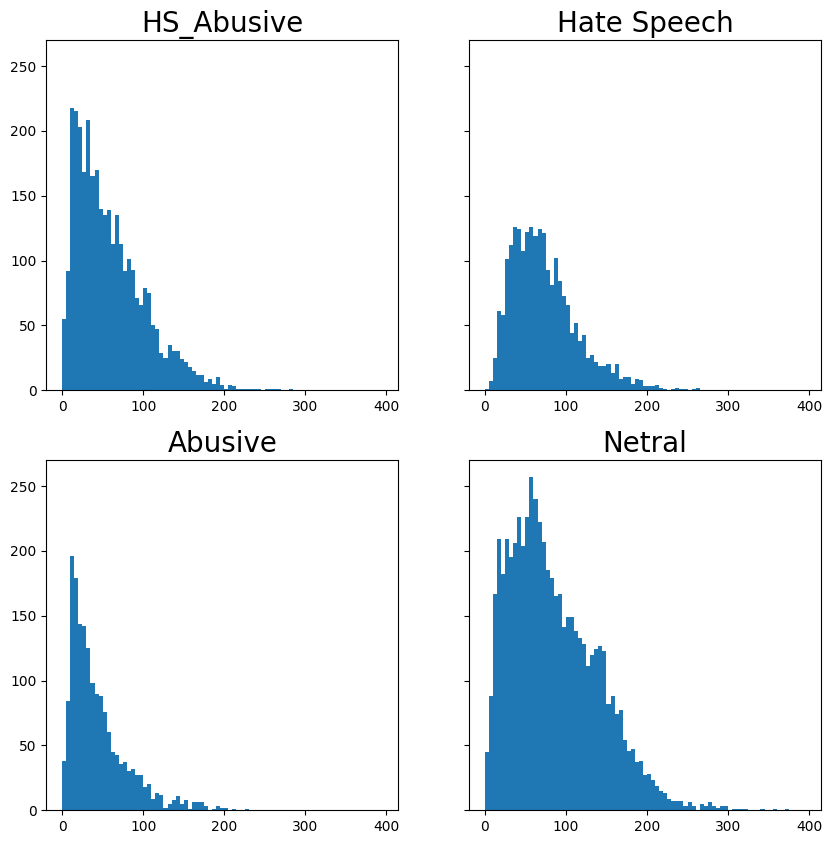

In [41]:
bins_ = np.linspace(0, 400, 80, endpoint=False)

fig, ax = plt.subplots(2, 2, figsize=(10,10), sharey=True)

ax[0,0].hist(HS_Abusive_1, bins= bins_)
ax[0,0].set_title('HS_Abusive', fontsize=20)
    
ax[0,1].hist(HS_1, bins= bins_)
ax[0,1].set_title('Hate Speech', fontsize=20)

ax[1,0].hist(Abusive_1, bins= bins_)
ax[1,0].set_title('Abusive', fontsize=20)

ax[1,1].hist(HS_Abusive_0, bins= bins_)
ax[1,1].set_title('Netral', fontsize=20)

plt.show()

# Calculate Length of word and character

In [42]:
df_baru = df_tweet.reindex(columns=['Tweet','Tweet_token', 'type_of_Tweet'])
df_baru

,Tweet,Tweet_token,type_of_Tweet
0,di saat cowok berusaha melacak perhatian lanta...,"[cowok, berusaha, melacak, perhatian, lantas, ...",Hate Speech & Abusive
1,telat edan sarap bergaul cigax jifla calis licew,"[telat, edan, sarap, bergaul, cigax, jifla, ca...",Abusive
2,kadang berpikir percaya tuhan jatuh berkali ka...,"[kadang, berpikir, percaya, tuhan, jatuh, berk...",Netral
3,matamu sipit,"[matamu, sipit]",Netral
4,kaum cebong kafir dongoknya dungu haha,"[kaum, cebong, kafir, dongoknya, dungu, haha]",Hate Speech & Abusive
...,...,...,...
13164,berbicara ndasmu congor sekate anjing,"[berbicara, ndasmu, congor, sekate, anjing]",Hate Speech & Abusive
13165,kasur enak kunyuk,"[kasur, enak, kunyuk]",Abusive
13166,hati hati bisu bosan duh,"[hati, hati, bisu, bosan, aduh]",Netral
13167,bom real mudah terdeteksi bom terkubur dahsyat...,"[bom, real, mudah, terdeteksi, bom, terkubur, ...",Netral


In [43]:
#length of word
df_baru['Length_Word'] = df_baru['Tweet_token'].apply(lambda x: len(x))

#length of character
df_baru['Length_Character'] = df_baru['Tweet'].apply(lambda x: len(x))

proses di atas adalah fungsi untuk menghitung banyak karakter dan kata pada setiap (row) berdasarkan kolom Tweet

In [44]:
df_baru.head()

,Tweet,Tweet_token,type_of_Tweet,Length_Word,Length_Character
0,di saat cowok berusaha melacak perhatian lanta...,"[cowok, berusaha, melacak, perhatian, lantas, ...",Hate Speech & Abusive,12,96
1,telat edan sarap bergaul cigax jifla calis licew,"[telat, edan, sarap, bergaul, cigax, jifla, ca...",Abusive,8,48
2,kadang berpikir percaya tuhan jatuh berkali ka...,"[kadang, berpikir, percaya, tuhan, jatuh, berk...",Netral,19,138
3,matamu sipit,"[matamu, sipit]",Netral,2,12
4,kaum cebong kafir dongoknya dungu haha,"[kaum, cebong, kafir, dongoknya, dungu, haha]",Hate Speech & Abusive,6,38


In [45]:
df_baru.describe()

,Length_Word,Length_Character
count,13023.000000,13023.000000
mean,10.154189,71.808877
std,6.626673,49.414568
min,1.000000,0.000000
25%,5.000000,33.000000
50%,9.000000,61.000000
75%,14.000000,100.000000
max,49.000000,374.000000


## Banyak Karakter

### OUTLIER

In [46]:
# Cari nilai minimum
p_min = df_baru.Length_Character.min()
print("nilai min= ", p_min)

# Cari nilai maximum
p_max = df_baru.Length_Character.max()
print("nilai max= ", p_max)

# Cari quartile range 1
q1 = df_baru.Length_Character.quantile(0.25)
print("q1= ", q1)

# Cari quartile range 3
q3 = df_baru.Length_Character.quantile(0.75)
print("q= ", q3)

# Cari interquartile range (IQR)
iqr = q3-q1
print("iqr= ", iqr)

# Cari batas bawah
lower_limit = q1-1.5*iqr
print("lower limit= ", lower_limit)

# Cari batas atas
upper_limit = q3+1.5*iqr
print("upper limit= ", upper_limit)

nilai min=  0
nilai max=  374
q1=  33.0
q=  100.0
iqr=  67.0
lower limit=  -67.5
upper limit=  200.5


In [47]:
# Batas bawah, nilai minimum, dan outlier Total Char
print("Batas bawah 'total_char': ", lower_limit)
print("Nilai minimum: ", p_min)

if(lower_limit < p_min):
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print('-------------------------------------------------------------------------------------')

# Batas atas, nilai maksimum, dan outlier Total Char
print("Batas atas 'total_char': ", upper_limit)
print("Nilai maksimum: ", p_max)

if(upper_limit > p_max):
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas bawah 'total_char':  -67.5
Nilai minimum:  0
Tidak ada outlier dari sisi batas bawah
-------------------------------------------------------------------------------------
Batas atas 'total_char':  200.5
Nilai maksimum:  374
Ada outlier dari sisi batas atas


In [48]:
df_baru2 = df_baru[['Length_Word', 'Length_Character']]

In [49]:
df_baru2.skew()

Length_Word         1.010202
Length_Character    1.045089
dtype: float64

In [50]:
df_baru2.kurtosis()

Length_Word         0.984947
Length_Character    1.130986
dtype: float64

In [51]:
df_baru2.corr()

,Length_Word,Length_Character
Length_Word,1.000000,0.978206
Length_Character,0.978206,1.000000


### Distribusi (Histogram)

In [52]:
Char_HS_Abusive = df_baru[df_baru['type_of_Tweet'] == 'Hate Speech & Abusive' ]['Length_Character']
Char_Hate_Speech = df_baru[df_baru['type_of_Tweet'] == 'Hate Speech' ]['Length_Character']
Char_Abusive = df_baru[df_baru['type_of_Tweet'] == 'Abusive' ]['Length_Character']

Char_Non_Netral = df_baru[df_baru['type_of_Tweet'] != 'Netral' ]['Length_Character']
Char_Netral = df_baru[df_baru['type_of_Tweet'] == 'Netral' ]['Length_Character']
Char_all = df_baru['Length_Character']

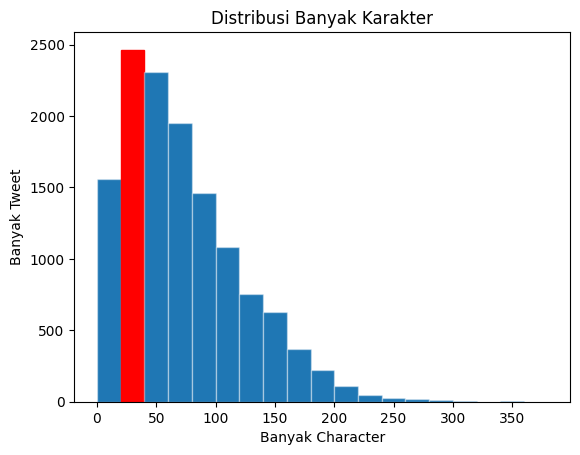

In [53]:
bins_ = np.linspace(0, 400, 20, endpoint=False)

values, bins, patches = plt.hist(Char_all, bins= bins_, edgecolor=(1, 1, 1, .4))
order = np.argsort(values)[::-1]

for i in order[:1]:
    patches[i].set_color('red')
    
plt.title('Distribusi Banyak Karakter')
plt.xlabel('Banyak Character')
plt.ylabel('Banyak Tweet')
plt.show()

In [56]:
Char_Non_Netral.describe()

count    7243.000000
mean       60.720006
std        42.020583
min         0.000000
25%        28.000000
50%        52.000000
75%        84.000000
max       285.000000
Name: Length_Character, dtype: float64

In [57]:
Char_Netral.describe()

count    5780.000000
mean       85.704498
std        54.242139
min         0.000000
25%        43.000000
50%        75.000000
75%       122.000000
max       374.000000
Name: Length_Character, dtype: float64

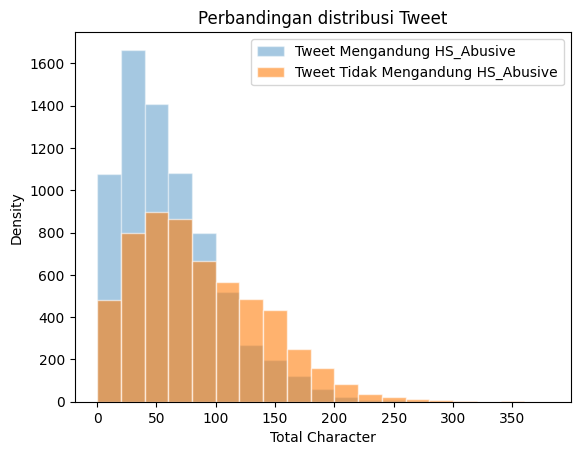

In [74]:
bins_ = np.linspace(0, 400, 20, endpoint=False)

plt.hist(Char_Non_Netral, bins= bins_, alpha = 0.4, label = 'Tweet Mengandung HS_Abusive', edgecolor=(1, 1, 1, .4))
plt.hist(Char_Netral, bins= bins_, alpha = 0.6, label = 'Tweet Tidak Mengandung HS_Abusive', edgecolor=(1, 1, 1, .4))
plt.title('Perbandingan distribusi Tweet')
plt.xlabel('Total Character')
plt.ylabel('Density')
plt.legend()
plt.show()

In [59]:
df_baru.head()

,Tweet,Tweet_token,type_of_Tweet,Length_Word,Length_Character
0,di saat cowok berusaha melacak perhatian lanta...,"[cowok, berusaha, melacak, perhatian, lantas, ...",Hate Speech & Abusive,12,96
1,telat edan sarap bergaul cigax jifla calis licew,"[telat, edan, sarap, bergaul, cigax, jifla, ca...",Abusive,8,48
2,kadang berpikir percaya tuhan jatuh berkali ka...,"[kadang, berpikir, percaya, tuhan, jatuh, berk...",Netral,19,138
3,matamu sipit,"[matamu, sipit]",Netral,2,12
4,kaum cebong kafir dongoknya dungu haha,"[kaum, cebong, kafir, dongoknya, dungu, haha]",Hate Speech & Abusive,6,38


In [60]:
df_baru.groupby('type_of_Tweet', observed=False).agg({'Length_Character':['describe']}).reset_index()

type_of_Tweet Length_Character                                   \
                                 describe                                    
                                    count       mean        std  min   25%   
0                Abusive           1742.0  44.963835  36.266522  0.0  18.0   
1            Hate Speech           2251.0  73.950244  40.760473  0.0  44.0   
2  Hate Speech & Abusive           3250.0  60.001846  42.726427  0.0  26.0   
3                 Netral           5780.0  85.704498  54.242139  0.0  43.0   

                       
                       
    50%    75%    max  
0  34.0   59.0  228.0  
1  67.0   95.0  263.0  
2  50.0   84.0  285.0  
3  75.0  122.0  374.0

In [61]:
df_baru.groupby('type_of_Tweet', observed=False).agg({'Length_Character':['max']}).reset_index()

,type_of_Tweet,Length_Character
,,max
0,Abusive,228
1,Hate Speech,263
2,Hate Speech & Abusive,285
3,Netral,374


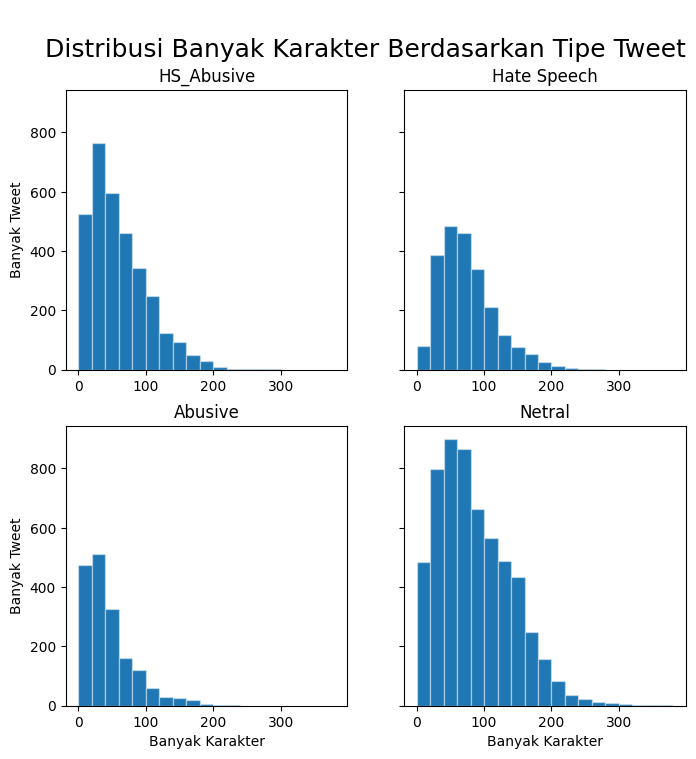

In [62]:
bins_ = np.linspace(0, 400, 20, endpoint=False)

fig, ax = plt.subplots(2, 2, figsize=(8,8), sharey=True)
fig.suptitle('\nDistribusi Banyak Karakter Berdasarkan Tipe Tweet', fontsize=18)
plt.xlabel('coba')

ax[0,0].hist(Char_HS_Abusive, bins= bins_, edgecolor=(1, 1, 1, .4))
ax[0,0].set_title('HS_Abusive', fontsize=12)
ax[0,0].set_ylabel('Banyak Tweet')
order = np.argsort(values)[::-1]
    
ax[0,1].hist(Char_Hate_Speech, bins= bins_, edgecolor=(1, 1, 1, .4))
ax[0,1].set_title('Hate Speech', fontsize=12)

ax[1,0].hist(Char_Abusive, bins= bins_, edgecolor=(1, 1, 1, .4))
ax[1,0].set_title('Abusive', fontsize=12)
ax[1,0].set_xlabel('Banyak Karakter')
ax[1,0].set_ylabel('Banyak Tweet')

ax[1,1].hist(Char_Netral, bins= bins_, edgecolor=(1, 1, 1, .4))
ax[1,1].set_title('Netral', fontsize=12)
ax[1,1].set_xlabel('Banyak Karakter')

plt.show()

## Banyak Kata

### Outlier

In [63]:
# Cari nilai minimum
p_min = df_baru.Length_Word.min()
print("nilai min= ", p_min)

# Cari nilai maximum
p_max = df_baru.Length_Word.max()
print("nilai max= ", p_max)

# Cari quartile range 1
q1 = df_baru.Length_Word.quantile(0.25)
print("q1= ", q1)

# Cari quartile range 3
q3 = df_baru.Length_Word.quantile(0.75)
print("q= ", q3)

# Cari interquartile range (IQR)
iqr = q3-q1
print("iqr= ", iqr)

# Cari batas bawah
lower_limit = q1-1.5*iqr
print("lower limit= ", lower_limit)

# Cari batas atas
upper_limit = q3+1.5*iqr
print("upper limit= ", upper_limit)

nilai min=  1
nilai max=  49
q1=  5.0
q=  14.0
iqr=  9.0
lower limit=  -8.5
upper limit=  27.5


In [64]:
# Batas bawah, nilai minimum, dan outlier Total Char
print("Batas bawah 'total_char': ", lower_limit)
print("Nilai minimum: ", p_min)

if(lower_limit < p_min):
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print('-------------------------------------------------------------------------------------')

# Batas atas, nilai maksimum, dan outlier Total Char
print("Batas atas 'total_char': ", upper_limit)
print("Nilai maksimum: ", p_max)

if(upper_limit > p_max):
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas bawah 'total_char':  -8.5
Nilai minimum:  1
Tidak ada outlier dari sisi batas bawah
-------------------------------------------------------------------------------------
Batas atas 'total_char':  27.5
Nilai maksimum:  49
Ada outlier dari sisi batas atas


In [65]:
word_HS_Abusive = df_baru[df_baru['type_of_Tweet'] == 'Hate Speech & Abusive' ]['Length_Word']
word_Hate_Speech = df_baru[df_baru['type_of_Tweet'] == 'Hate Speech' ]['Length_Word']
word_Abusive = df_baru[df_baru['type_of_Tweet'] == 'Abusive' ]['Length_Word']

word_Non_Netral = df_baru[df_baru['type_of_Tweet'] != 'Netral' ]['Length_Word']
word_Netral = df_baru[df_baru['type_of_Tweet'] == 'Netral' ]['Length_Word']
word_all = df_baru['Length_Word']

In [66]:
df_baru.groupby('type_of_Tweet', observed=False).agg({'Length_Word':['describe']}).reset_index()

type_of_Tweet Length_Word                                       \
                            describe                                        
                               count       mean       std  min  25%   50%   
0                Abusive      1742.0   6.919059  5.319628  1.0  3.0   5.0   
1            Hate Speech      2251.0  10.075966  5.357944  1.0  6.0   9.0   
2  Hate Speech & Abusive      3250.0   8.780308  5.993665  1.0  4.0   7.0   
3                 Netral      5780.0  11.932180  7.188215  1.0  6.0  11.0   

               
               
    75%   max  
0   9.0  41.0  
1  13.0  40.0  
2  12.0  42.0  
3  17.0  49.0

In [67]:
df_baru.groupby('type_of_Tweet', observed=False).agg({'Length_Word':['max']}).reset_index()

,type_of_Tweet,Length_Word
,,max
0,Abusive,41
1,Hate Speech,40
2,Hate Speech & Abusive,42
3,Netral,49


### Distribusi (Histogram)

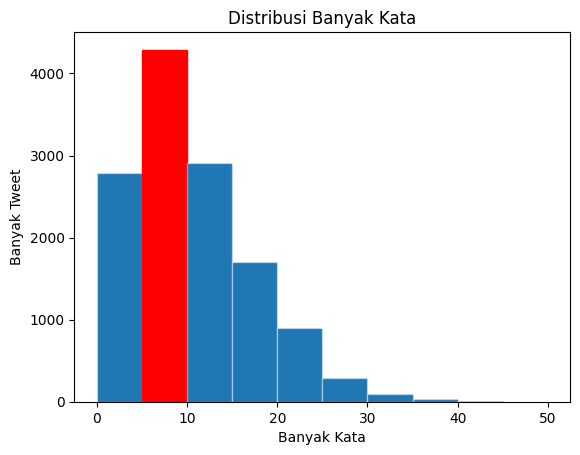

In [68]:
bins_ = np.linspace(0, 55, 11, endpoint=False)

values, bins, patches = plt.hist(word_all, bins= bins_, edgecolor=(1, 1, 1, .4))
order = np.argsort(values)[::-1]

for i in order[:1]:
    patches[i].set_color('red')
    
plt.title('Distribusi Banyak Kata')
plt.xlabel('Banyak Kata')
plt.ylabel('Banyak Tweet')

plt.show()

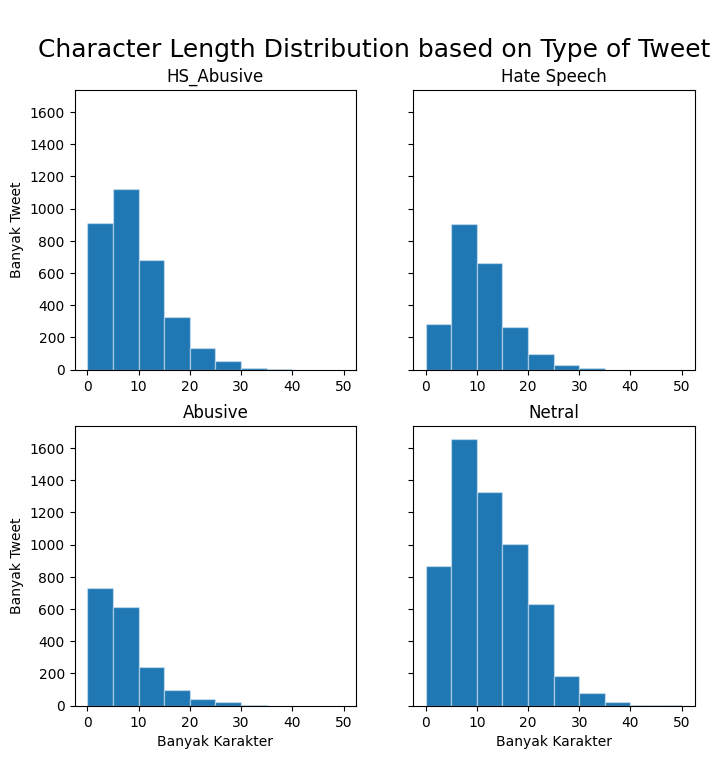

In [69]:
bins_ = np.linspace(0, 55, 11, endpoint=False)

fig, ax = plt.subplots(2, 2, figsize=(8,8), sharey=True)
fig.suptitle('\nCharacter Length Distribution based on Type of Tweet', fontsize=18)
plt.xlabel('coba')

ax[0,0].hist(word_HS_Abusive, bins= bins_, edgecolor=(1, 1, 1, .4))
ax[0,0].set_title('HS_Abusive', fontsize=12)
ax[0,0].set_ylabel('Banyak Tweet')
    
ax[0,1].hist(word_Hate_Speech, bins= bins_, edgecolor=(1, 1, 1, .4))
ax[0,1].set_title('Hate Speech', fontsize=12)

ax[1,0].hist(word_Abusive, bins= bins_, edgecolor=(1, 1, 1, .4))
ax[1,0].set_title('Abusive', fontsize=12)
ax[1,0].set_xlabel('Banyak Karakter')
ax[1,0].set_ylabel('Banyak Tweet')

ax[1,1].hist(word_Netral, bins= bins_, edgecolor=(1, 1, 1, .4))
ax[1,1].set_title('Netral', fontsize=12)
ax[1,1].set_xlabel('Banyak Karakter')

plt.show()

## Korelasi Banyak Karakter dan Banyak Kata

In [70]:
df_HS_Abusive_1 = df_baru[df_HS_Abusive['type_of_Tweet'] != 'Netral' ]
df_HS_Abusive_0 = df_baru[df_HS_Abusive['type_of_Tweet'] == 'Netral' ]

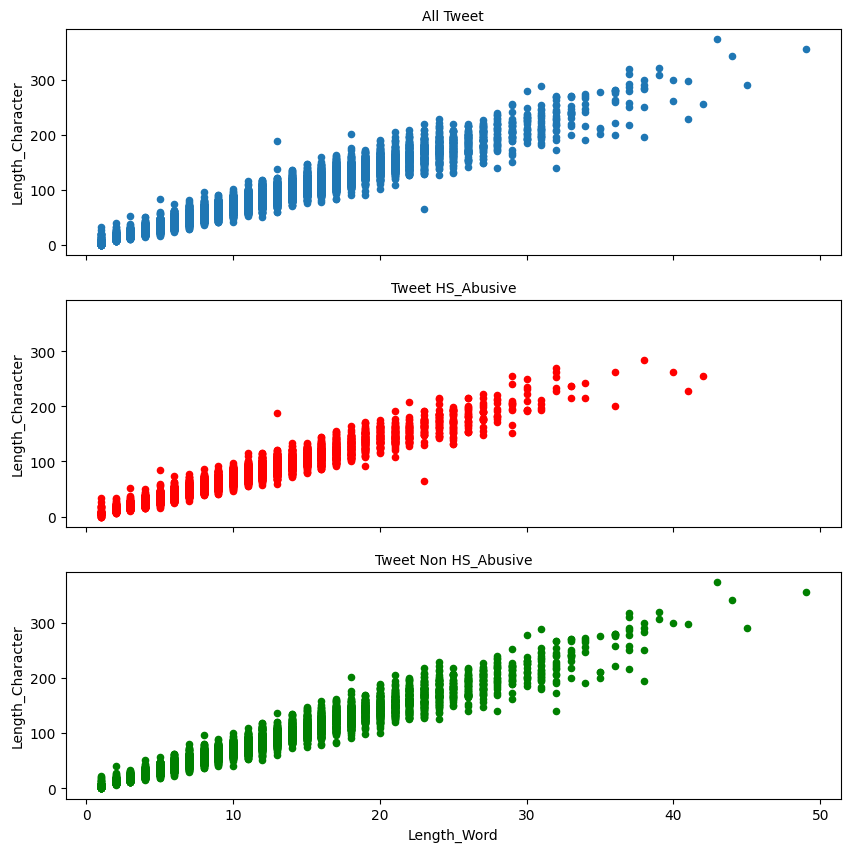

In [76]:
fig, ax = plt.subplots(3, figsize=(10,10), sharex=True, sharey=True)

df_baru.plot(x="Length_Word", y="Length_Character", kind="scatter", ax=ax[0])
ax[0].set_title('All Tweet', fontsize=10)

df_HS_Abusive_1.plot(x="Length_Word", y="Length_Character", kind="scatter", ax=ax[1], color='red')
ax[1].set_title('Tweet HS_Abusive', fontsize=10)

df_HS_Abusive_0.plot(x="Length_Word", y="Length_Character", kind="scatter", ax=ax[2], color='green')
ax[2].set_title('Tweet Non HS_Abusive', fontsize=10)

plt.show()

**Kesimpulan**: Dari ketiga gambar di atas, untuk 3 kategori yang berbeda semuanya menunjukkan korelasi yang positif antara banyak kata dan banyak karakter. Banyak kata berbanding lurus atau saling berhubungan dengan banyak karakter, artinya semakin banyak kata (sumbu X ke kanan) maka krakter juga akan semakin banyak (sumbu Y ke atas)